In [1]:
import numpy as np
import math as mth
import statistics as stat
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker

import Boundary_Functions as bf
import timeit
import tables
import h5py


from mpmath import *
from scipy.special import gamma as gamma
from scipy.special import gammaincc as gamma3
from mpmath import gammainc as gamma2

#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

In [2]:
uscal=2
vscal=2

In [3]:
rnputil=np.load('rnputil.npy')
wHD=rnputil[8]
print(wHD)

if wHD==True or wHD==1.0:
    urange=np.load('urange.npy')[::uscal]
    vrange=np.load('vrange.npy')[::vscal]
if wHD==False or wHD==0.0 or wHD==None:
    urange=np.load('urange.npy')
    vrange=np.load('vrange.npy')

1.0
10630000 bytes


In [ ]:
if wHD==True or wHD==1.0:
    with h5py.File('rnp.h5','r') as f:
        r_group_key = list(f.keys())[0]
        rnpi=f[r_group_key]
        rnp = np.asarray(rnpi[::uscal,::vscal])
    with h5py.File('signp.h5','r') as f:
        sig_group_key = list(f.keys())[0]
        signpi=f[sig_group_key]
        signp = np.asarray(signpi[::uscal,::vscal])
    with h5py.File('phinp.h5','r') as f:
        phi_group_key = list(f.keys())[0]
        phinpi=f[phi_group_key]
        phinp = np.asarray(phinpi[::uscal,::vscal])
    with h5py.File('massnp.h5','r') as f:
        mass_group_key = list(f.keys())[0]
        massnpi=f[mass_group_key]
        massnp = np.asarray(massnpi[::uscal,::vscal])
    
    print(str(rnp.nbytes)+" bytes")
    print("Hd5 files used")

if wHD==False or wHD==0.0 or WHD==None:
    rnp=np.load('rnp.npy')
    signp=np.load('sig.npy')
    phinp=np.load('phi.npy')
    massnp=np.load('mass.npy')
    print("Numpy arrays used")

In [4]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0

rplus=M0+(M0**2-Q**2)**(0.5)
rminus=M0-(M0**2-Q**2)**(0.5)
    
numpoints=Nu*Nv
print(str(numpoints)+" points")

if Q==0.0:
    predtime=numpoints/(17530)
if Q>0.0:
    predtime=numpoints/(204896)
print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")

[  5.31250000e+06   2.12500000e+03   2.50000000e+03   5.00000000e+00
   4.00000000e-01   1.00000000e+00   9.50000000e-01   0.00000000e+00
   1.00000000e+00]
N=5312500
1328750 points
Runtime: about 0.11 minutes


In [5]:
if M0==0.0:
    rlist=np.zeros((Nu,Nv))
    dr0u=-1/(4*dr0v)

    for i in range(0,Nu):
        for j in range(0,Nv):
            rlist[i][j]=ru0+dr0u/N*i+dr0v/N*j


In [6]:
if M0>0.0 and Q==0.0:
    ulist=np.empty((Nu))*np.nan
    vlist=np.empty((Nv))*np.nan
    
    #rlistu=ru0+bf.dr2(M0,dr0v,ru0)*np.arange(0,umax,du0)
    #rlistv=ru0+dr0v*np.arange(0,vmax,dv0)

    rlistu=rnp[:,0]
    rlistv=rnp[0,:]
    
    #print(rlistv)

    ulist=np.empty((Nu))
    vlist=np.empty((Nv))

    for i in range(0,Nu):
        if rlistu[i]>rminus:
            ulist[i]=bf.rbounschinv(M0,ru0,bf.dr2(M0,dr0v,ru0)*(bf.esig(M0,rlistu[0]))**(1),rlistu[i])
        else:
            ulist[i]=np.nan
    
    for j in range(0,Nv):
        vlist[j]=bf.rbounschinv(M0,ru0,dr0v*bf.esig(M0,rlistu[0])**(1),rlistv[j])

    #print(vlist)
    plt.plot(ulist)
    plt.show()

In [7]:
if M0>0.0 and Q==0.0:        
    rlist=np.zeros((Nu,Nv))*np.nan

    for i in range(0,Nu):
        for j in range(0,Nv):
            rlist[i][j]=bf.rsch(M0,ru0,dr0v,ulist[i],vlist[j])
            #if rlist[i][j]>0.0:
                #continue
            #else:
                    #rlistv[j]=np.nan
                #break
            

1250
1063
1063
1250


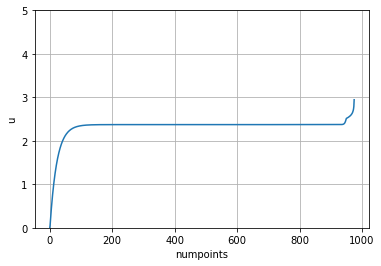

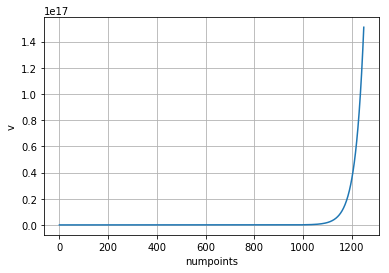

[ 0.          0.05854249  0.16133124 ...,         nan         nan
         nan]


In [8]:
if M0>0.0 and Q>0.0:
    #rlistu=ru0+bf.dr2rn(M0,Q,dr0v,ru0)*np.arange(0,umax,du0)
    #rlistv=ru0+dr0v*np.arange(0,vmax,dv0)

    rlistu=rnp[:,0]
    rlistv=rnp[0,:]
    
    print(len(rnp[0]))
    
    #print(bf.esigrn(M0,Q,ru0))
    #print(rlistu)

    ulist=np.empty((Nu))*np.nan
    vlist=np.empty((Nv))*np.nan
    
    print(len(rlistu))
    print(Nu)
    print(Nv)
    
    for i in range(0,Nu):
        if rlistu[i]>rminus:
            ulist[i]=bf.rbounrninv(float(rlistu[i]),M0,Q,ru0,bf.dr2rn(M0,Q,dr0v,ru0)*(bf.esigrn(M0,Q,rlistv[0]))**(1))
        else:
            ulist[i]=np.nan

    for i in range(0,Nv):
        vlist[i]=bf.rbounrninv(float(rlistv[i]),M0,Q,ru0,dr0v*(bf.esigrn(M0,Q,rlistv[0]))**(1))

    plt.plot(ulist)#,rlistu)
    plt.xlabel('numpoints')
    plt.ylabel('u')
    #plt.xlabel('u')
    #plt.ylabel('r')
    #plt.xlim(0,1)
    plt.ylim(0,5)
    plt.grid()
    plt.show()    
    
    plt.plot(vlist)#,rlistv)
    plt.xlabel('numpoints')
    plt.ylabel('v')
    #plt.xlabel('v')
    #plt.ylabel('r')
    #plt.xlim(0,1)
    #plt.ylim(4,5)
    plt.grid()
    plt.show()

    print(ulist)

In [9]:
if M0>0.0 and Q>0.0:
    rlist=np.zeros((Nu,Nv))*np.nan
    for i in range(0,Nu):
    #for j in range(0,Nv):
        rlist[i]=bf.rrn(M0,Q,ru0,dr0v,signp[i][0],ulist,vlist,i).reshape(Nv)

C:\Users\Brandon Piotrzkowski\OneDrive\Research\Summer 2017 Research\py codes\notebooks\Boundary_Functions.py:144: RuntimeWarning: invalid value encountered in power
  return 1/r**2*dr0*mth.exp(2*kplus*(ru0-r))*(r-rminus)**(1+kplus/kminus)*(ru0-rminus)**(-1-kplus/kminus)*ru0**2#*mth.exp(sig)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


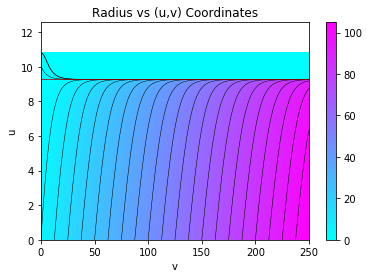

In [10]:
levels=np.arange(5.0, np.nanmax(rlist), 5.0 )
#levels=np.arange(5.0, 100, 5.0 )
levels=np.insert(levels,0,[rminus+.01,.7,1.0,rplus])

plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(rlist),cmap=plt.cm.cool,vmin=0.0,vmax=np.nanmax(rlist))
plot4=plt.contour(vrange,urange,rlist,levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,rlist, [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(vrange,urange,rlist, [rminus],linewidths=1.0,linestyles='dashed',colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#plt.clabel(plot4, levels,  
           #inline=0, inline_spacing=0, 
           #fmt='%1.2f',rightside_up=True,
           #fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
#plt.ylim(0,11)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Radius vs (u,v) Coordinates')
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()


1063


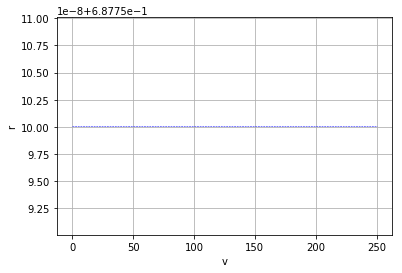

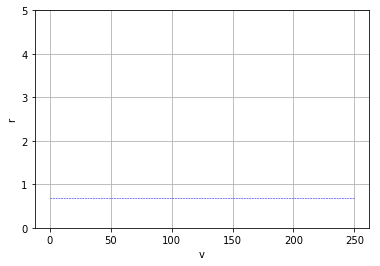

In [11]:
print(Nu)
Ni=2500
while Ni<Nu:
    plt.plot(vrange,rlist[Ni,:])
    Ni+=10
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5)
plt.ylim(rminus-0.00000001,rminus+0.00000001)
plt.xlabel('v')
plt.ylabel('r')
plt.grid()
plt.show()

Ni=2500
while Ni<Nu:
    plt.plot(vrange,rlist[Ni,:])
    plt.plot(vrange,rnp[Ni,:])
    #print(Ni)
    Ni+=100
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5)
#plt.ylim(rminus-0.1,rminus+0.1)
plt.xlabel('v')
plt.ylabel('r')
plt.ylim(0,5)
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


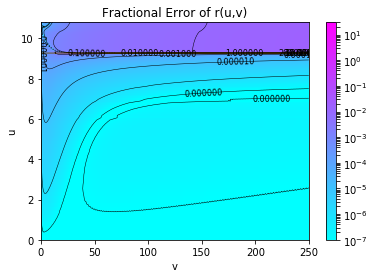

In [12]:
rdiff=np.ma.masked_invalid(abs((rlist-rnp)/rlist))


if M0==0.0:
    levelsdiff=[10**(-11.0),10**(-10.0),10**(-9.0)]
if M0>0.0 and Q==0.0:
    levelsdiff=[.00001,.0001,.001]
if M0>0.0 and Q>0.0:
    levelsdiff=[10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(-0),10**(1),20**(1),30**(1)]

plot1=plt.pcolormesh(vrange,urange,rdiff,cmap=plt.cm.cool, norm=colors.LogNorm(vmin=min(levelsdiff), vmax=max(levelsdiff)))#,vmin=0.0,vmax=.0001)
#plt.ylim(0,10.8)
plot4=plt.contour(vrange,urange,rdiff, levelsdiff,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,rlist, [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,rnp, [rplus],linewidths=0.5,colors='green',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(vrange,urange,rlist, [rminus],linewidths=1.0,linestyles='dashed',colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#fmt={str(10**(-2)):10**(-2)}
plt.clabel(plot4, levelsdiff,  
           inline=0, inline_spacing=0, 
           fmt='%1.6f',rightside_up=True,
           fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim(0,vmax)
#plt.ylim(9.27585,9.27615) #normal
#plt.ylim(9.27589,9.27591)
plt.ylim(0,10.8)
plt.colorbar(plot1)
plt.title('Fractional Error of r(u,v)')
#plt.savefig('EH-mismatch-dblNv.png',dpi=300)
plt.show()

Max error is: 105.53406391
Mean error is: 8.39906806783
Standard Deviation is: 18.685757238


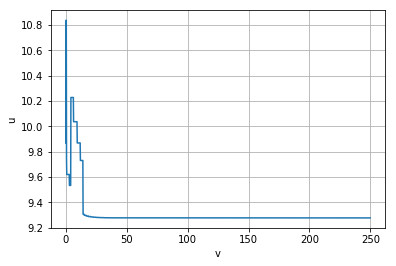

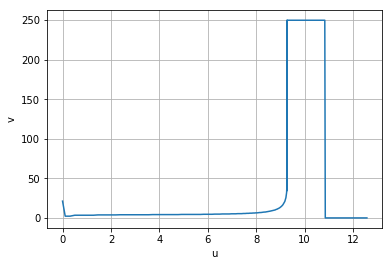

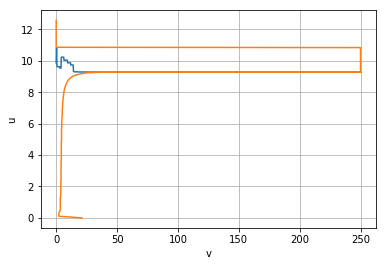

In [13]:
print("Max error is: "+str(np.nanmax(rdiff)))
print("Mean error is: "+str(np.nanmean(rdiff)))
print("Standard Deviation is: "+str(np.nanstd(rdiff)))
plt.plot(vrange,urange[np.argmax(rdiff,axis=0)])
plt.xlabel('v')
plt.ylabel('u')
plt.grid()
plt.show()
plt.plot(urange,vrange[np.argmax(rdiff,axis=1)])
plt.xlabel('u')
plt.ylabel('v')
plt.grid()
plt.show()

plt.plot(vrange,urange[np.argmax(rdiff,axis=0)])
plt.plot(vrange[np.argmax(rdiff,axis=1)],urange)
plt.xlabel('v')
plt.ylabel('u')
plt.grid()
plt.show()
#print(rlist[570,570])

#print(rdiff)

In [14]:
stop = timeit.default_timer()

In [15]:
acttime=stop - start

numpoints=Nu*Nv



print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str(numpoints)+' points')

print(str((numpoints)/(stop - start))+' points per second') 

exttimef=(acttime-predtime)/60

exttime=format(abs((acttime-predtime)/60),'.2f')
if exttimef>0.0:
    print("Took "+str(exttime)+" more minutes")
if exttimef<0.0:
    print("Took "+str(exttime)+" less minutes")
if exttimef==0.0:
    print("Took exactly the right time!!!!")

21.752231952381116 seconds
0.3625371992063519 minutes
0.006042286653439199 hours
61085.685501553686 points per second
Took 0.25 more minutes


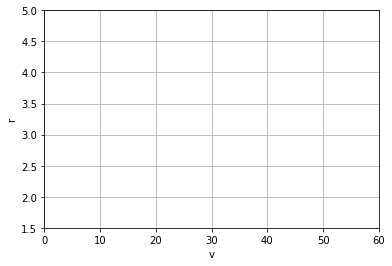

In [16]:
plt.plot(vrange,rlist[300,:])
plt.ylim(1.5,5)
plt.xlim(0,60)
plt.xlabel('v')
plt.ylabel('r')
plt.grid()
plt.show()



In [17]:
print(Nu)
urange2=[]
for i in range(0,Nu-1):
    urange2.append(urange[i+1]-urange[i])
print(np.argmin(urange2))
print(urange[np.argmin(urange2)])

1063
724
9.27606362724


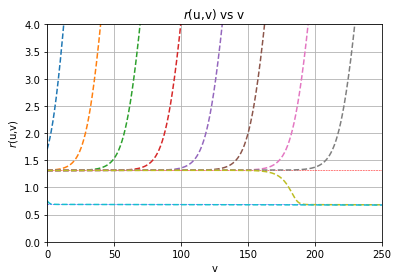

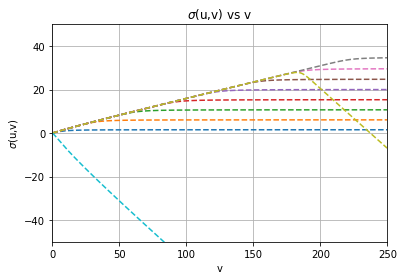

In [18]:
#uNEH=Nu-10
#ustep=1
#uN1=uNEH#uNEH-3000
uNEH=3167
ustep=100
uN1=uNEH-3100
Numax=Nu


uN=uN1
plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
while uN< Numax:
    if uN<uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],'--',label='u='+str(urange[uN]))
    if uN==uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],label='u='+str(urange[uN]))
    if uN>uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],'-.',label='u='+str(urange[uN]))
    #sample3=plt.plot(vrange,signp[uN1+uN,:])
    uN+=ustep
plt.xlim(0,vmax)
plt.xlabel('v')
plt.ylabel(r'$r$(u,v)')
plt.ylim(0,4)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()
plt.grid()
plt.title(r'$r$(u,v) vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
#plt.savefig('rEH-RN.png',dpi=300,bbox_inches="tight")
plt.show()

uN=uN1
while uN< Numax:
    if uN<uNEH:
        sample3=plt.plot(vrange,signp[uN,:],'--',label='u='+str(uN))
    if uN==uNEH:
        sample3=plt.plot(vrange,signp[uN,:])
    if uN>uNEH:
        sample3=plt.plot(vrange,signp[uN,:],'-.')
    #sample3=plt.plot(vrange,signp[uN1+uN,:])
    uN+=ustep
plt.xlim(0,vmax)
plt.xlabel('v')
plt.ylabel(r'$\sigma$(u,v)')
plt.ylim(-50,50)
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.title(r'$\sigma$(u,v) vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
#plt.savefig('sigEH-RN.png',dpi=300,bbox_inches="tight")
plt.show()

In [19]:
for j in range(0,Nv):
    print(rnp[3300,j])

IndexError: index 3300 is out of bounds for axis 0 with size 1063